In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

def NOTIMPLEMENTED():
    raise NotImplementedError('Must specify config path')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [4]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [00:57<00:00, 17.35it/s]


In [5]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_e1 0.13287845581232932 0.15823044717305812
external_shear_e2 0.21716452906916972 0.3350411195724635
lens_mass_center_x 0.008550609987877093 0.029348538345965534
lens_mass_center_y 0.010870328841216192 0.02931114293498431
lens_mass_e1 0.027285733029246993 0.04020119613873907
lens_mass_e2 0.03205669065718693 0.04736704713500085
lens_mass_gamma 0.04820161487704655 0.06841903839182342
lens_mass_theta_E_log 0.010103618267954216 0.027507485057338812


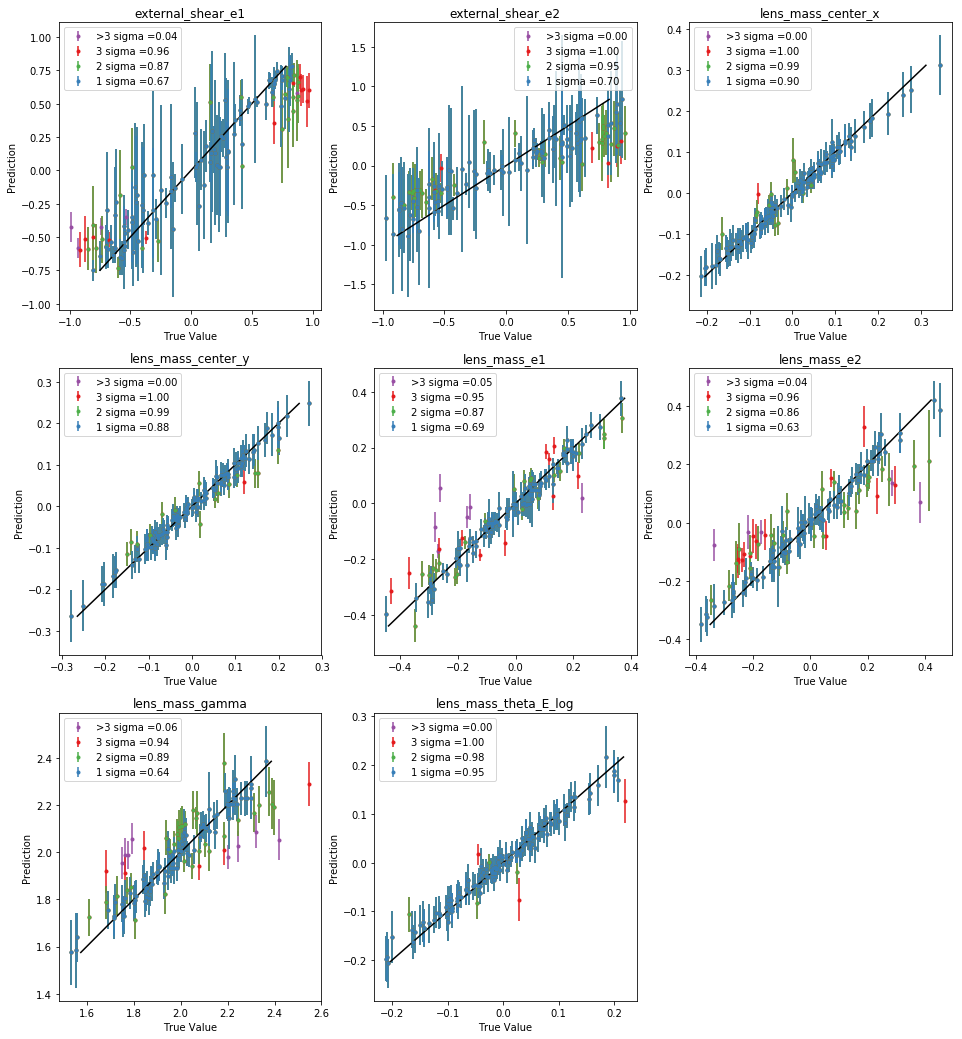

In [6]:
bnn_infer.gen_coverage_plots()

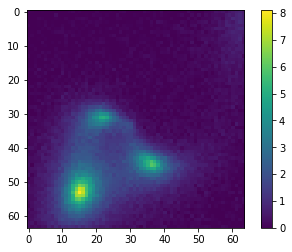

external_shear_e1 0.19266969
external_shear_e2 -0.52461076
lens_mass_center_x -0.04897496
lens_mass_center_y 0.067853525
lens_mass_e1 0.23028061
lens_mass_e2 0.2939071
lens_mass_gamma 1.7179093
lens_mass_theta_E_log 0.11208402


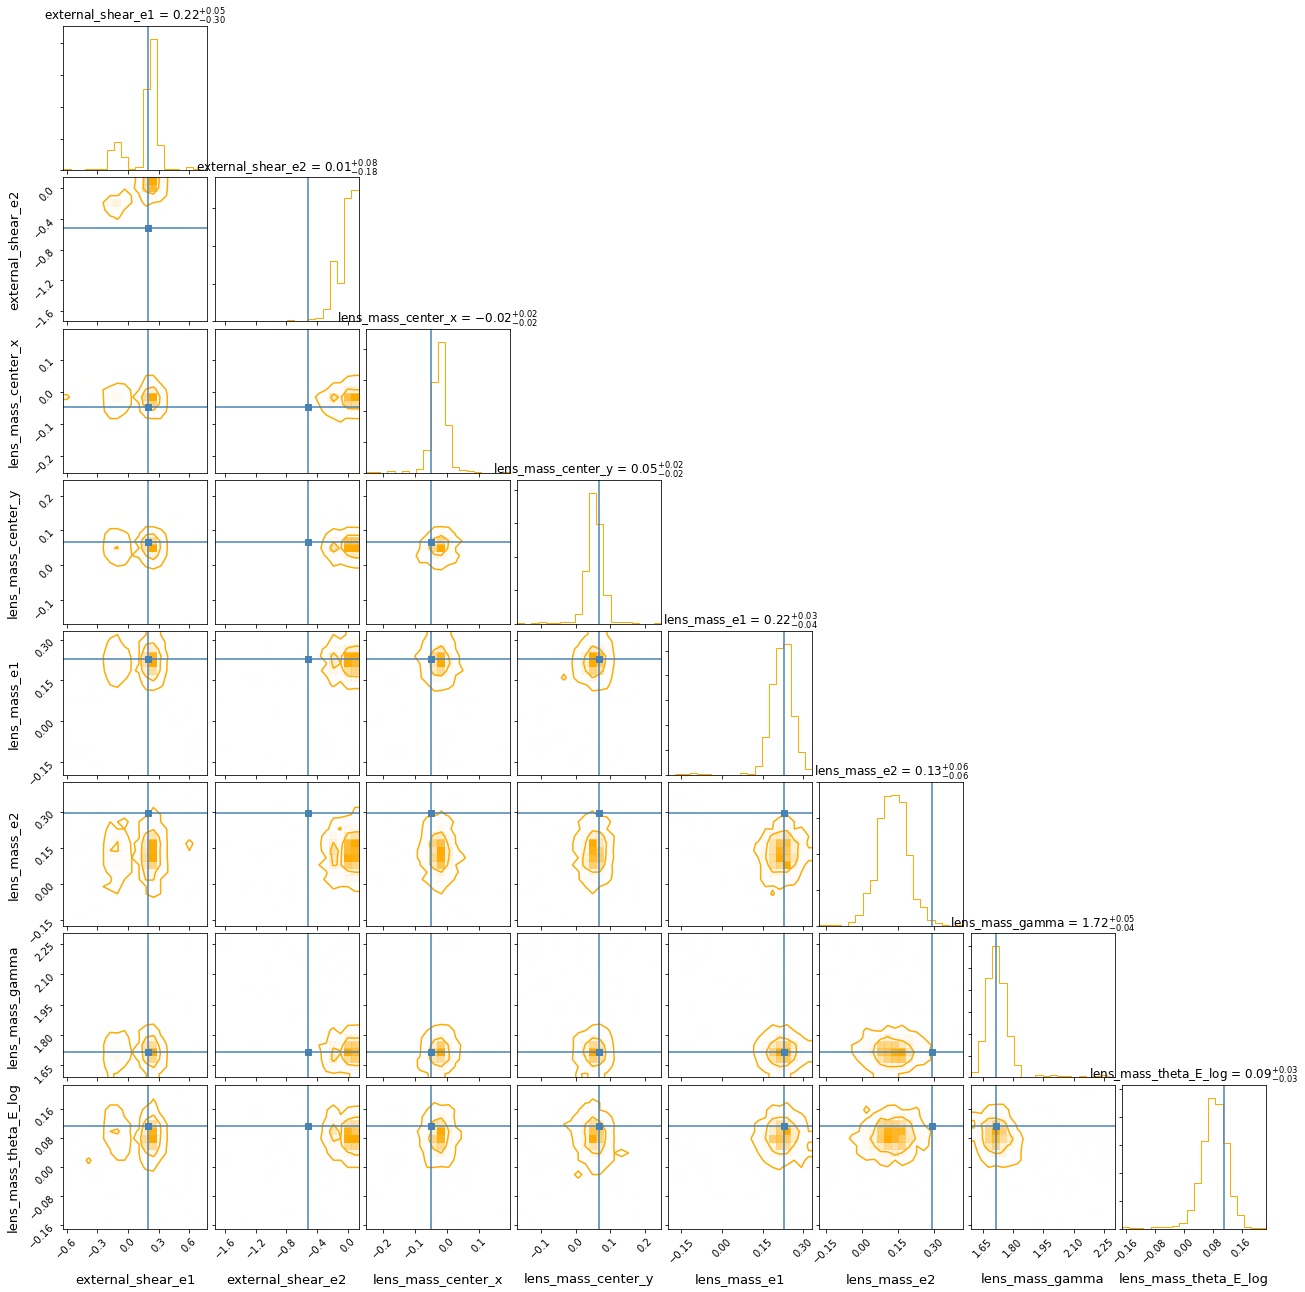

In [13]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

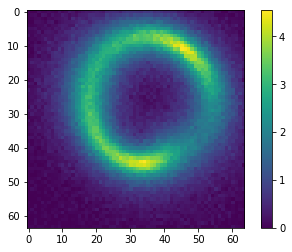

external_shear_e1 -0.87042665
external_shear_e2 -0.24264276
lens_mass_center_x 0.13594937
lens_mass_center_y -0.1384266
lens_mass_e1 -0.106109984
lens_mass_e2 0.042750333
lens_mass_gamma 2.0251117
lens_mass_theta_E_log -0.07558193


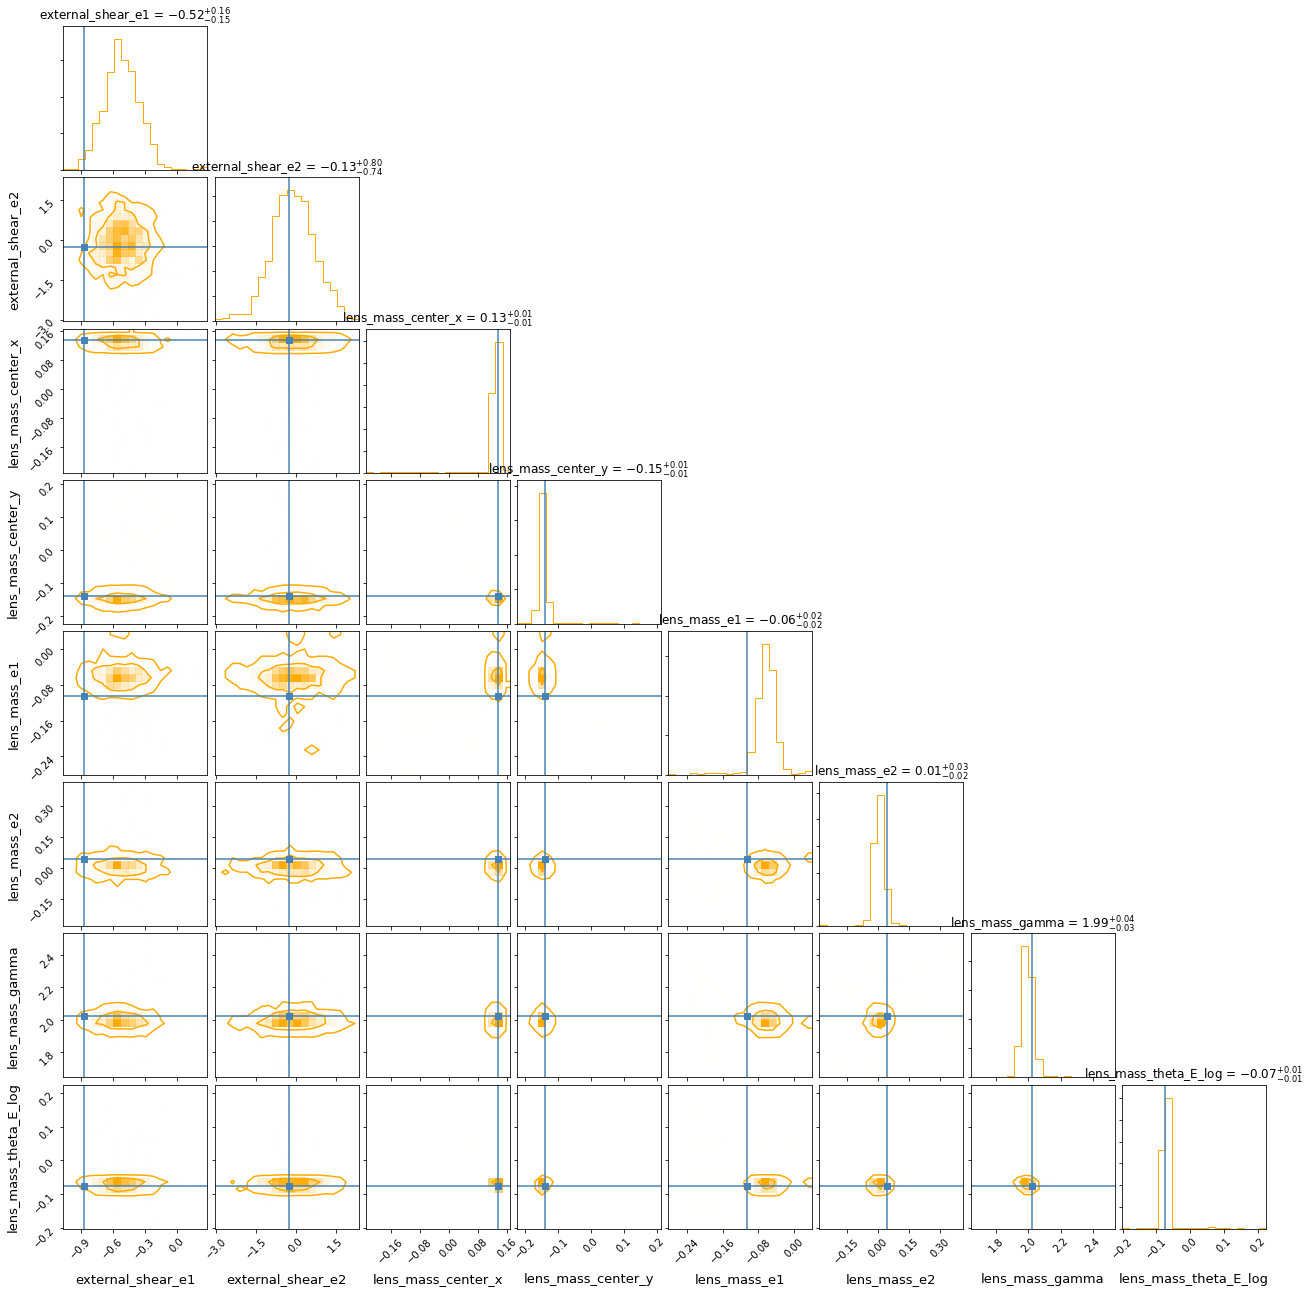

In [14]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)

## Diagonal Posterior - Shifting Image

In [15]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1_shift.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [00:57<00:00, 17.34it/s]


In [16]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_e1 0.14873223146282807 0.1625491417955074
external_shear_e2 0.21142018919557165 0.3433340922867806
lens_mass_center_x 0.009661142013407016 0.037327552934366494
lens_mass_center_y 0.00972617543781721 0.04000537256042749
lens_mass_e1 0.027693212075685175 0.03907886317688755
lens_mass_e2 0.03456414441061047 0.04836535922287049
lens_mass_gamma 0.040261730746762425 0.07153007384642679
lens_mass_theta_E_log 0.01075388700277493 0.027463658815594386


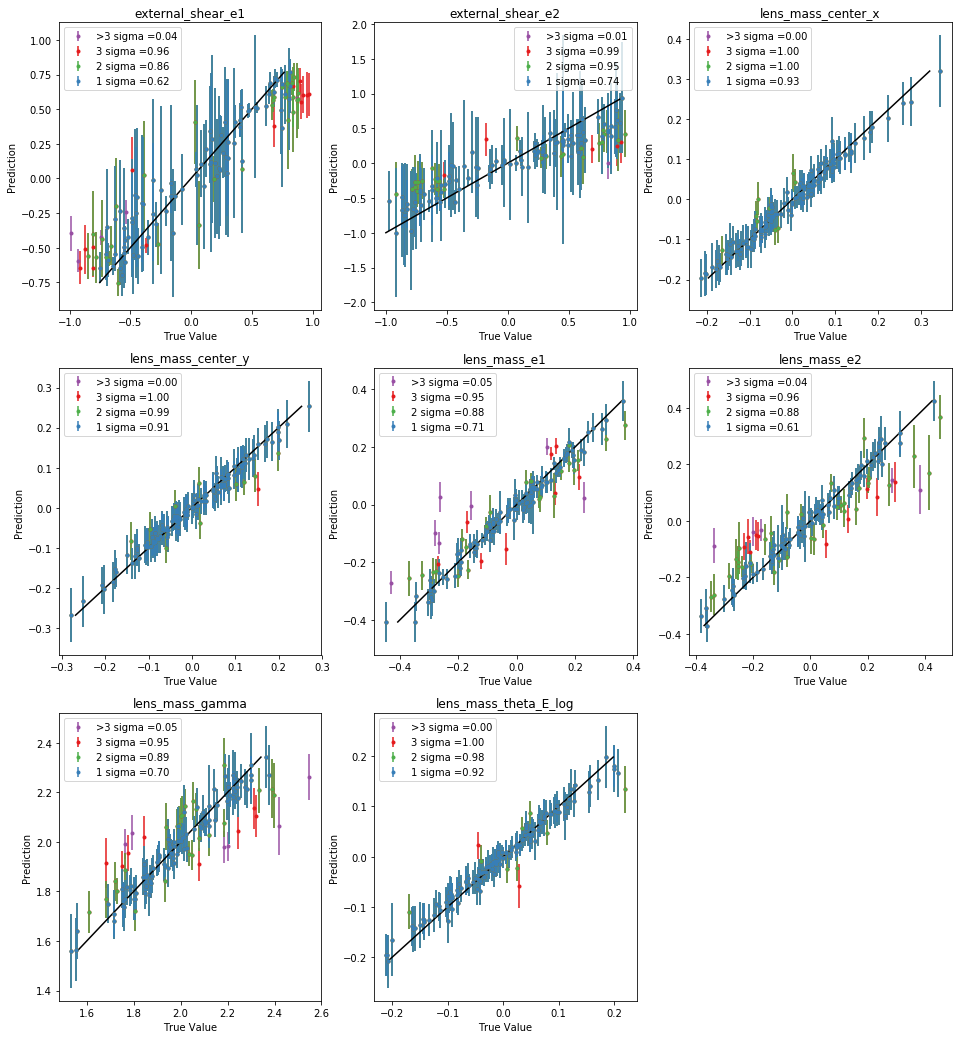

In [17]:
bnn_infer.gen_coverage_plots()

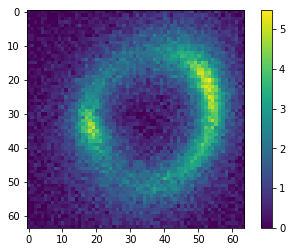

external_shear_e1 -0.29140398
external_shear_e2 -0.8303792
lens_mass_center_x 0.04141301
lens_mass_center_y -0.014758166
lens_mass_e1 0.058758
lens_mass_e2 -0.10358068
lens_mass_gamma 2.2088635
lens_mass_theta_E_log -0.053339463


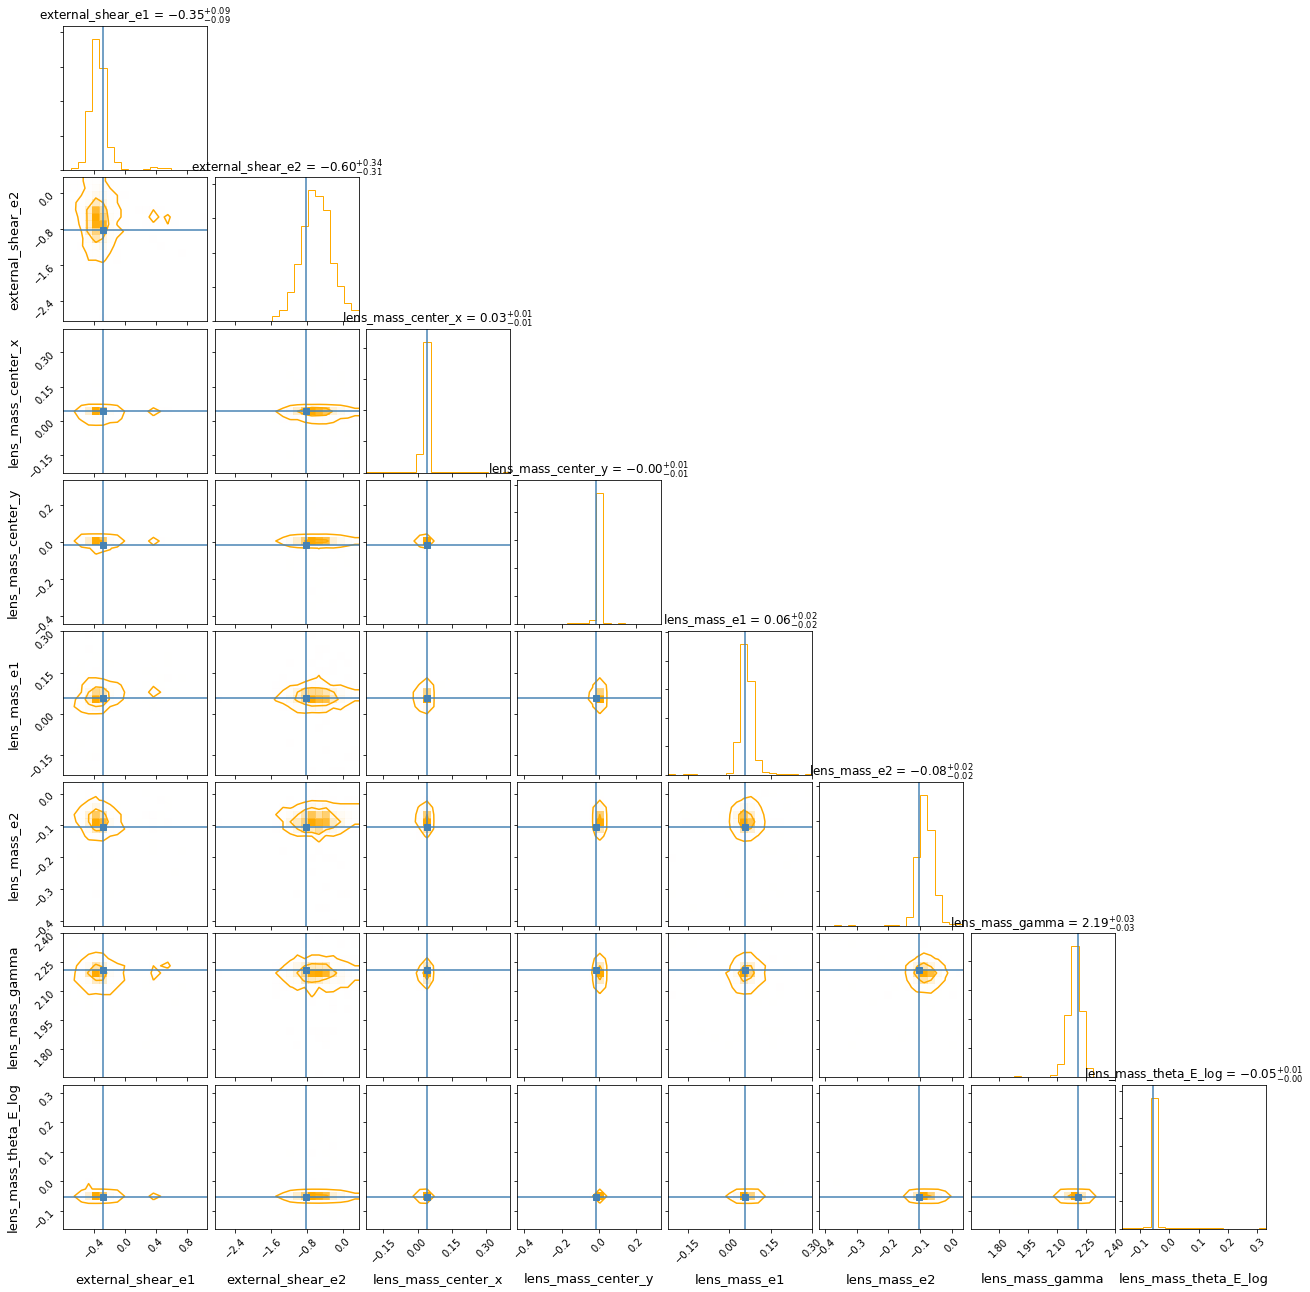

In [18]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

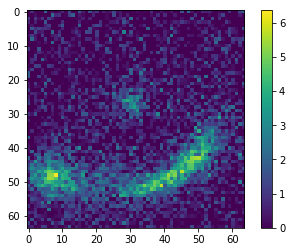

external_shear_e1 0.46957305
external_shear_e2 -0.3272191
lens_mass_center_x -0.049306132
lens_mass_center_y 0.14651802
lens_mass_e1 -0.14563811
lens_mass_e2 -0.09435817
lens_mass_gamma 1.9729527
lens_mass_theta_E_log -0.15823641


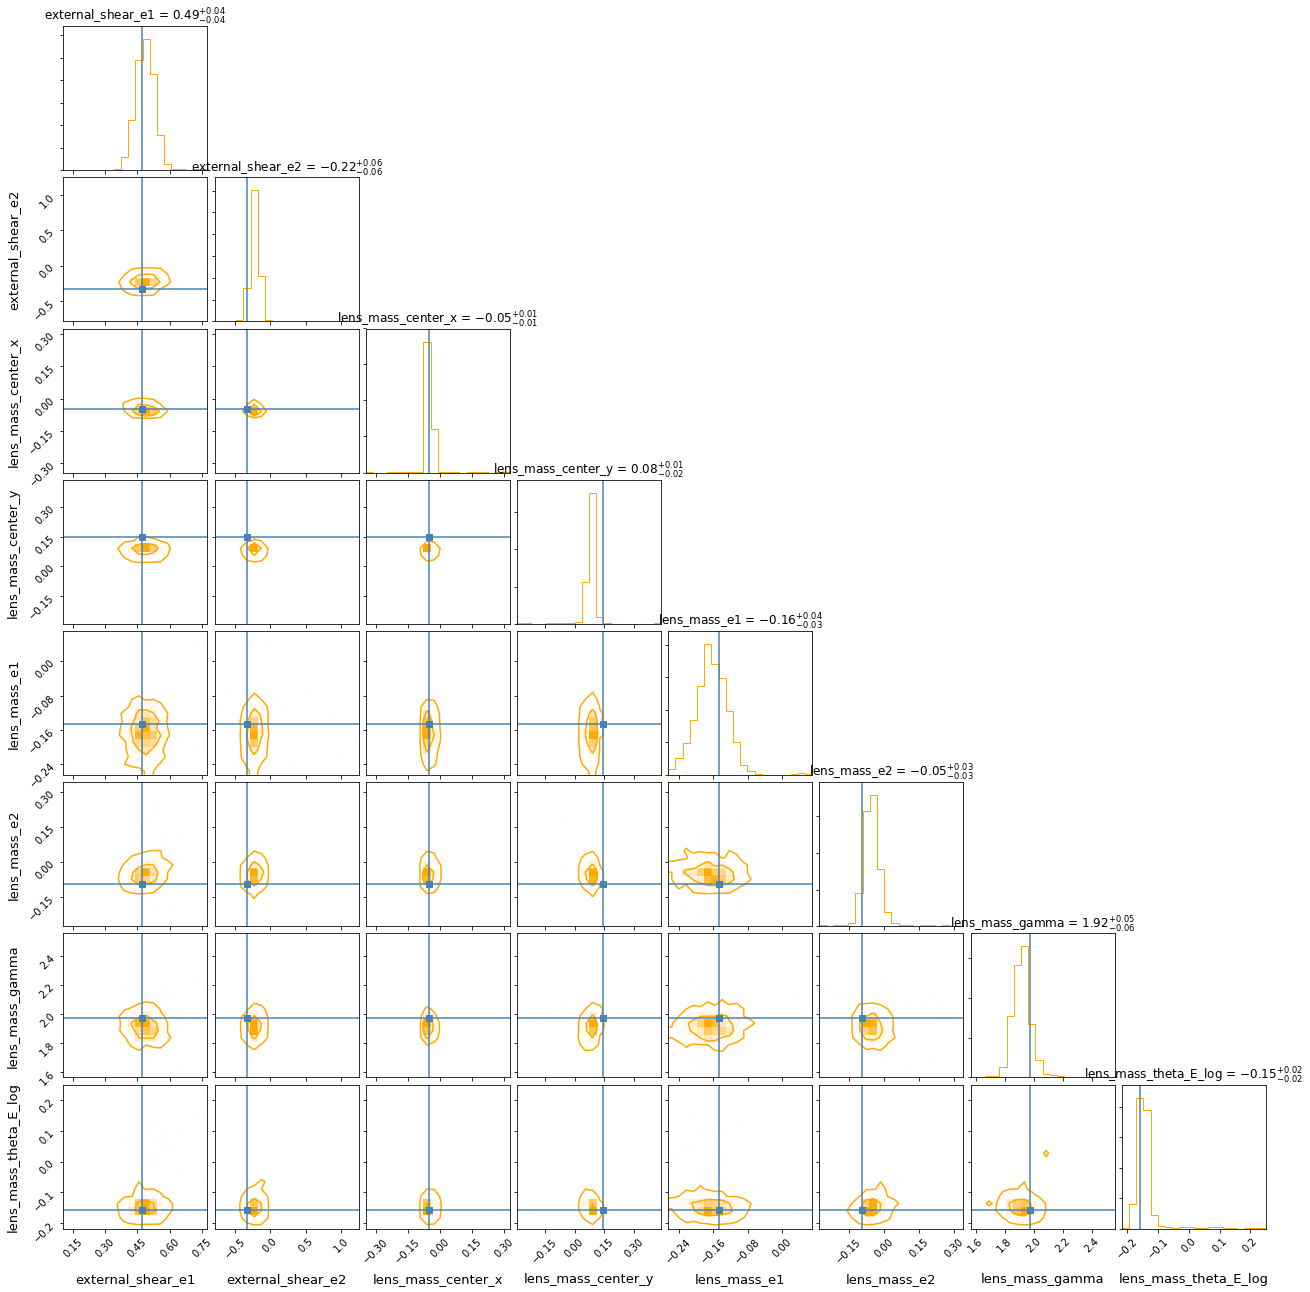

In [19]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)

## Diagonal Posterior - Shifting Image + Large Regularizer

In [20]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/t1_hr.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
bnn_infer.gen_samples(num_samples)

100%|██████████| 1000/1000 [00:57<00:00, 17.33it/s]


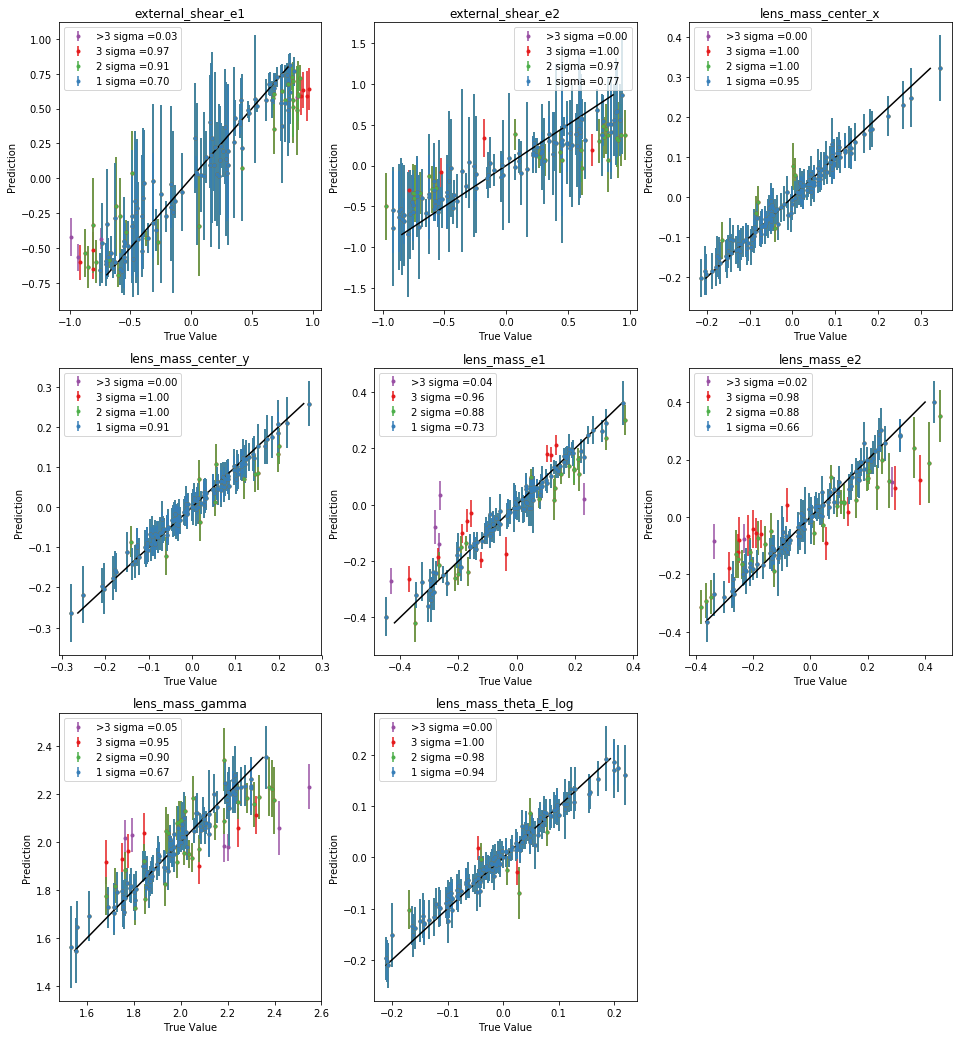

In [21]:
bnn_infer.gen_coverage_plots()

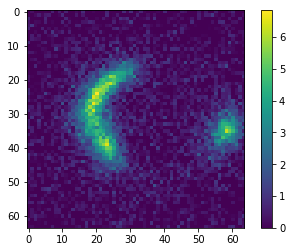

external_shear_e1 0.83806634
external_shear_e2 0.44987476
lens_mass_center_x 0.044151004
lens_mass_center_y -0.03254472
lens_mass_e1 -0.34788495
lens_mass_e2 -0.12993078
lens_mass_gamma 2.0050497
lens_mass_theta_E_log -0.07891502


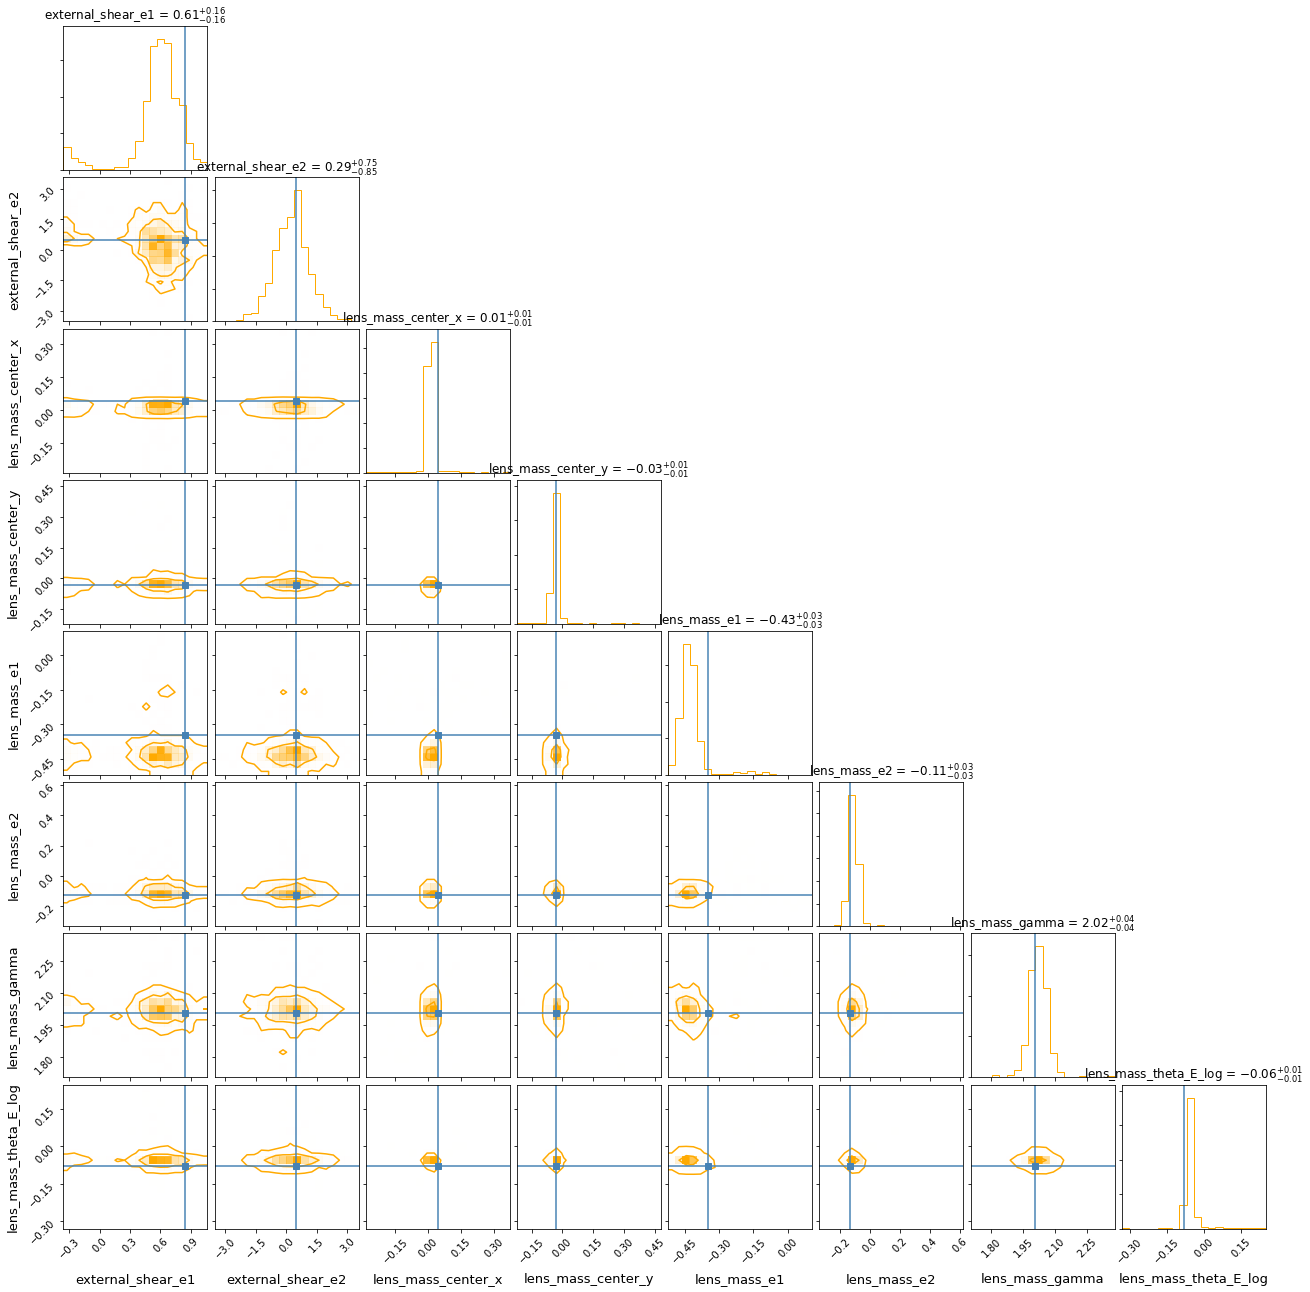

In [22]:
image_index = 10
bnn_infer.plot_posterior_contours(image_index)

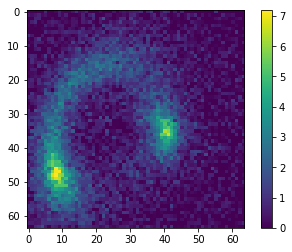

external_shear_e1 0.81051385
external_shear_e2 0.5158096
lens_mass_center_x -0.09432464
lens_mass_center_y 0.16909118
lens_mass_e1 0.100333296
lens_mass_e2 0.18822311
lens_mass_gamma 1.9625404
lens_mass_theta_E_log -0.08080719


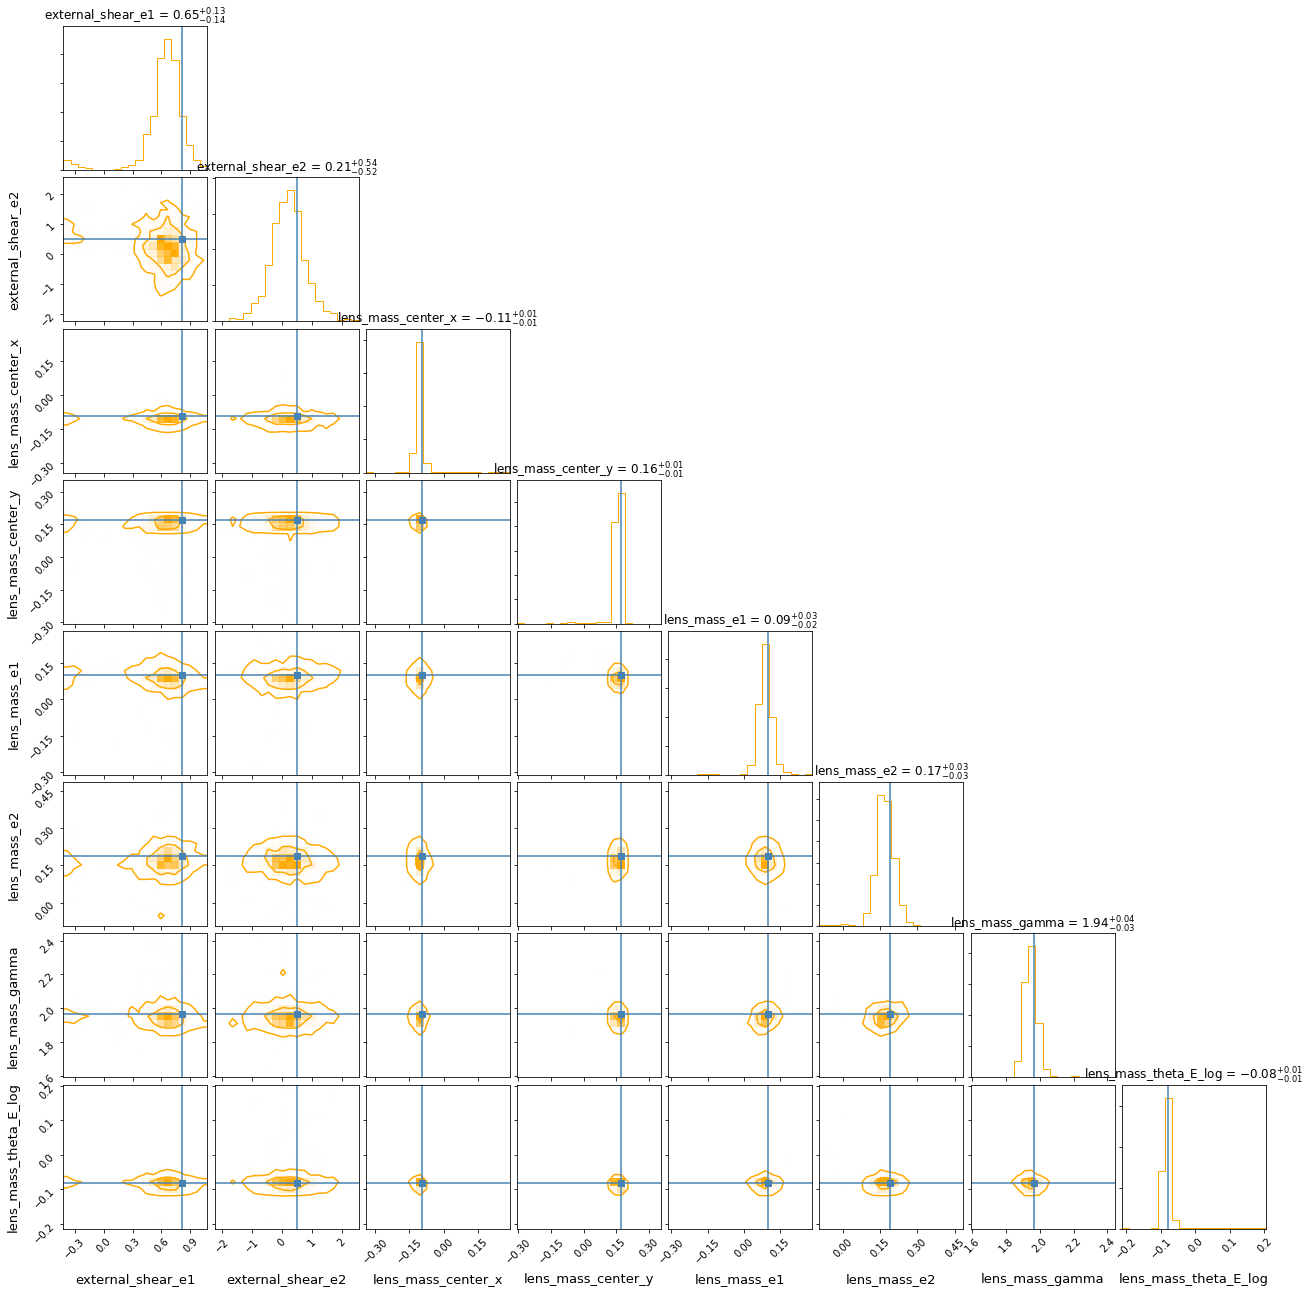

In [23]:
image_index = 5
bnn_infer.plot_posterior_contours(image_index)